In [1]:
import pandas as pd

# Importing Data #

In [2]:
pd.read_csv("dji.csv").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3333 non-null   object 
 1   Open       3333 non-null   float64
 2   High       3333 non-null   float64
 3   Low        3333 non-null   float64
 4   Close      3333 non-null   float64
 5   Adj Close  3333 non-null   float64
 6   Volume     3333 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 182.4+ KB


In [3]:
# Now we can see that 'Date' column is Object dtype. so i will change it.
data = pd.read_csv("dji.csv", parse_dates=["Date"], index_col="Date")
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,12459.540039,12580.349609,12404.820312,12474.519531,12474.519531,327200000
2007-01-04,12473.160156,12510.410156,12403.860352,12480.690430,12480.690430,259060000
2007-01-05,12480.049805,12480.129883,12365.410156,12398.009766,12398.009766,235220000
2007-01-08,12392.009766,12445.919922,12337.370117,12423.490234,12423.490234,223500000
2007-01-09,12424.769531,12466.429688,12369.169922,12416.599609,12416.599609,225190000
...,...,...,...,...,...,...
2020-03-24,19722.189453,20737.699219,19649.250000,20704.910156,20704.910156,799340000
2020-03-25,21050.339844,22019.929688,20538.339844,21200.550781,21200.550781,796320000
2020-03-26,21468.380859,22595.060547,21427.099609,22552.169922,22552.169922,705180000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3333 entries, 2007-01-03 to 2020-03-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3333 non-null   float64
 1   High       3333 non-null   float64
 2   Low        3333 non-null   float64
 3   Close      3333 non-null   float64
 4   Adj Close  3333 non-null   float64
 5   Volume     3333 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 182.3 KB


In [5]:
# I am interested in only 10y period, that's why i will take from 2010 to 2020 (when prices fell). 
# We want daily close prices so i created frame for only Close column
df = data.loc["2010-01-01":"2020-03-31", "Close"].to_frame()
df

,Close
Date,
2010-01-04,10583.959961
2010-01-05,10572.019531
2010-01-06,10573.679688
2010-01-07,10606.860352
2010-01-08,10618.190430
...,...
2020-03-24,20704.910156
2020-03-25,21200.550781
2020-03-26,22552.169922


# Data Visualization #

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use("seaborn-v0_8-colorblind")

In [7]:
sea_prnt = [i for i in plt.style.available if "seaborn" in i]
print(sea_prnt)

['seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid']


In [8]:
df.describe()

,Close
count,2577.000000
mean,17820.342520
std,5292.260933
min,9686.480469
25%,13034.490234
50%,17113.150391
75%,21892.429688
max,29551.419922


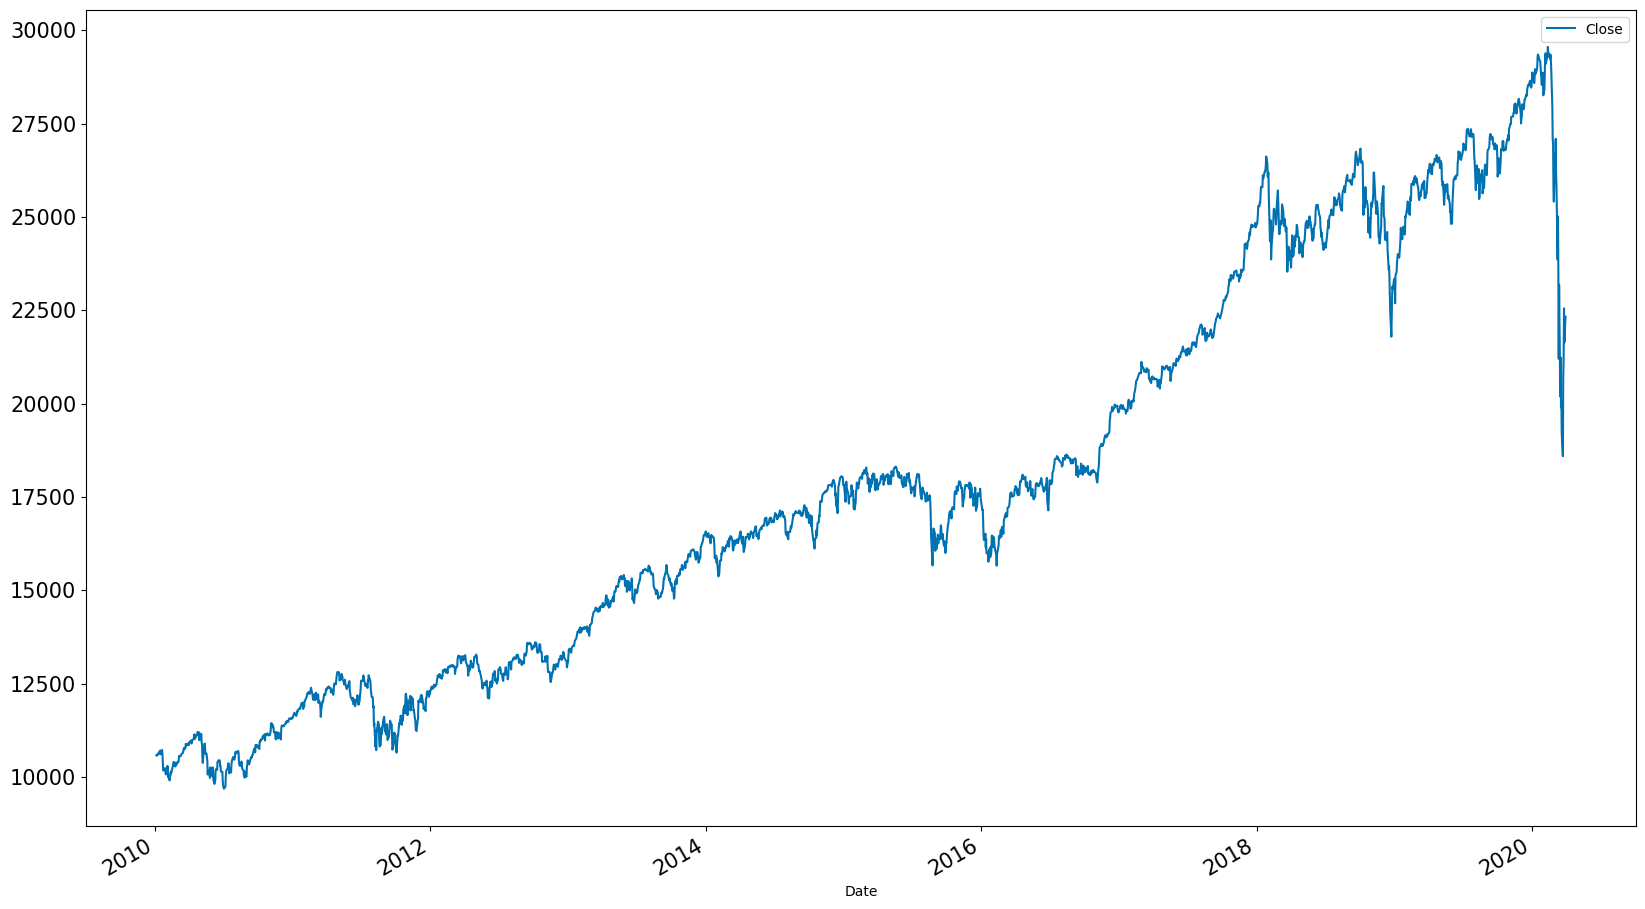

In [9]:
df.plot(figsize= (20, 12), fontsize= 15)
plt.legend(fontsize = 10)
plt.show()

In [10]:
# We can see dramatic drop at 2020
# next lets calculate daily returns
df['Return'] = df.pct_change()

In [11]:
df

,Close,Return
Date,,
2010-01-04,10583.959961,NaN
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
...,...,...
2020-03-24,20704.910156,0.113650
2020-03-25,21200.550781,0.023938
2020-03-26,22552.169922,0.063754


In [12]:
df.dropna(inplace = True)
df

,Close,Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2020-03-24,20704.910156,0.113650
2020-03-25,21200.550781,0.023938
2020-03-26,22552.169922,0.063754


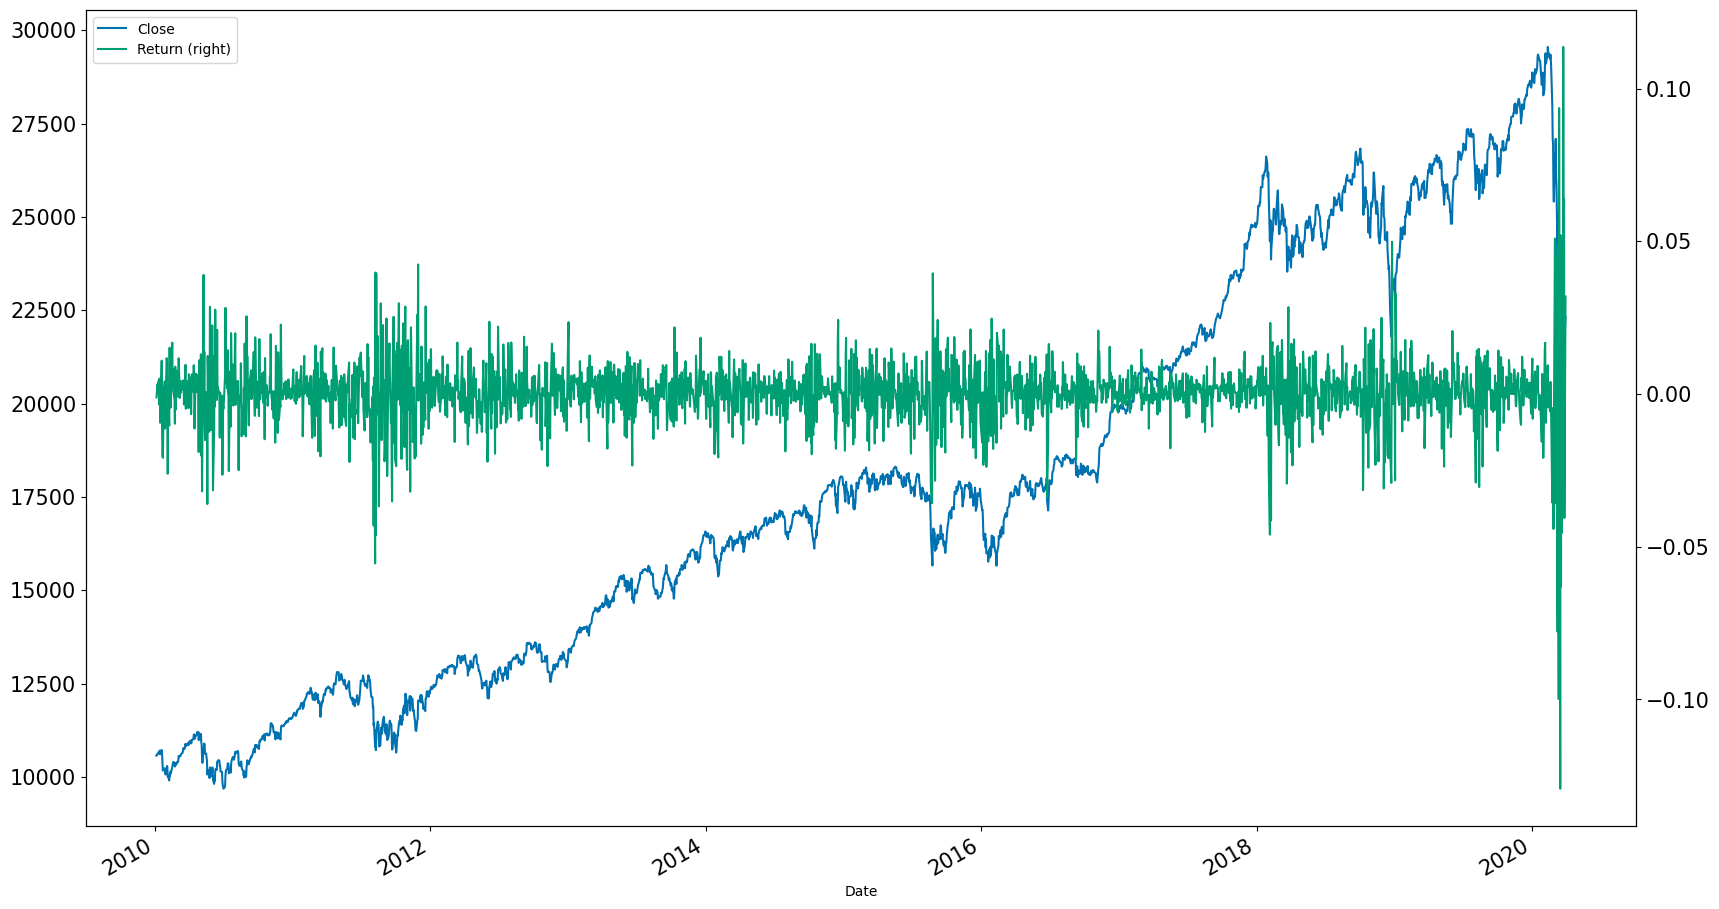

In [13]:
df.plot(figsize= (20, 12), secondary_y= "Return", mark_right= True, fontsize= 15)
plt.show()

In [14]:
df.rename(columns={'Close':'DJI_Close', 'Return':'DJI_Retrun'},inplace= True)
df

,DJI_Close,DJI_Retrun
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2020-03-24,20704.910156,0.113650
2020-03-25,21200.550781,0.023938
2020-03-26,22552.169922,0.063754


# Backtesting a simple Momentum Strategy #

We know **Basic** strategy (Passive): 

-- **Buy and Hold**: investing into something and do nothing

Also:

There is an **Simple Momentum** strategy (Active):

-- a) **Investing** (+1) tomorrow if today's return was **Positive**

-- b) **Short selling** (-1) tomorrow if today's return was **Negative**

We will test Active strategy.


In [15]:
df

,DJI_Close,DJI_Retrun
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2020-03-24,20704.910156,0.113650
2020-03-25,21200.550781,0.023938
2020-03-26,22552.169922,0.063754


In [16]:
df['Position'] = np.sign(df['DJI_Retrun'])
df

,DJI_Close,DJI_Retrun,Position
Date,,,
2010-01-05,10572.019531,-0.001128,-1.0
2010-01-06,10573.679688,0.000157,1.0
2010-01-07,10606.860352,0.003138,1.0
2010-01-08,10618.190430,0.001068,1.0
2010-01-11,10663.990234,0.004313,1.0
...,...,...,...
2020-03-24,20704.910156,0.113650,1.0
2020-03-25,21200.550781,0.023938,1.0
2020-03-26,22552.169922,0.063754,1.0


In [17]:
df['Strategy_ret'] = df['Position'].shift() * df['DJI_Retrun']

In [18]:
df

,DJI_Close,DJI_Retrun,Position,Strategy_ret
Date,,,,
2010-01-05,10572.019531,-0.001128,-1.0,NaN
2010-01-06,10573.679688,0.000157,1.0,-0.000157
2010-01-07,10606.860352,0.003138,1.0,0.003138
2010-01-08,10618.190430,0.001068,1.0,0.001068
2010-01-11,10663.990234,0.004313,1.0,0.004313
...,...,...,...,...
2020-03-24,20704.910156,0.113650,1.0,-0.113650
2020-03-25,21200.550781,0.023938,1.0,0.023938
2020-03-26,22552.169922,0.063754,1.0,0.063754


-- Now we want to compare prices with our Strategy prices --

-- we have to calculate cumulate of "Strategy_ret" --

In [19]:
df.Strategy_ret.add(1, fill_value=0).cumprod()

Date
2010-01-05    1.000000
2010-01-06    0.999843
2010-01-07    1.002981
2010-01-08    1.004052
2010-01-11    1.008383
                ...   
2020-03-24    0.472559
2020-03-25    0.483871
2020-03-26    0.514720
2020-03-27    0.493827
2020-03-30    0.478063
Name: Strategy_ret, Length: 2576, dtype: float64

In [20]:
df["Strategy"] = df.Strategy_ret.add(1, fill_value=0).cumprod() * df.iloc[0,0]
df

,DJI_Close,DJI_Retrun,Position,Strategy_ret,Strategy
Date,,,,,
2010-01-05,10572.019531,-0.001128,-1.0,NaN,10572.019531
2010-01-06,10573.679688,0.000157,1.0,-0.000157,10570.359375
2010-01-07,10606.860352,0.003138,1.0,0.003138,10603.529620
2010-01-08,10618.190430,0.001068,1.0,0.001068,10614.856140
2010-01-11,10663.990234,0.004313,1.0,0.004313,10660.641563
...,...,...,...,...,...
2020-03-24,20704.910156,0.113650,1.0,-0.113650,4995.902521
2020-03-25,21200.550781,0.023938,1.0,0.023938,5115.496000
2020-03-26,22552.169922,0.063754,1.0,0.063754,5441.629145


In [21]:
# As you can see, we started with "10572.019531" and we came to "5054.094112"
# So using the Active (Simple Momentum) strategy was disadvantageous

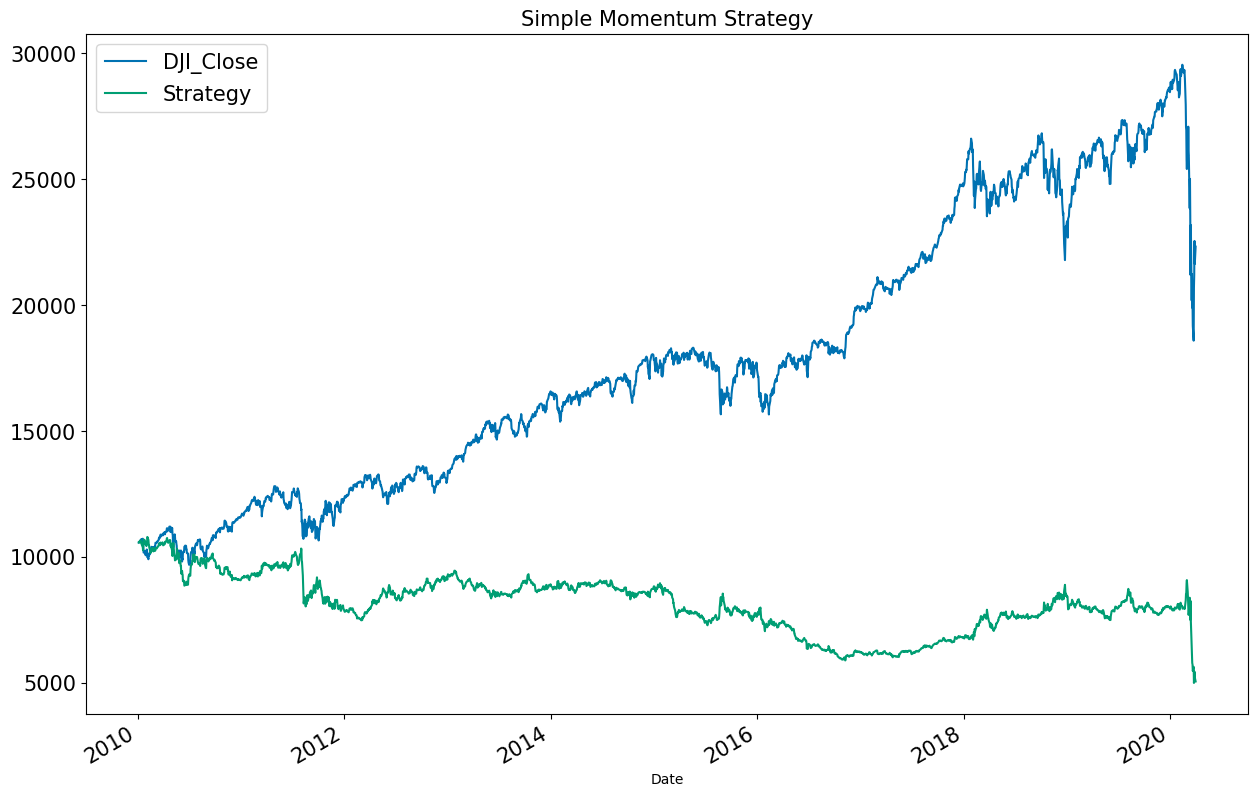

In [22]:
df[["DJI_Close", "Strategy"]].plot(figsize=(15, 10), fontsize=15)
plt.title("Simple Momentum Strategy", fontsize=15)
plt.legend(fontsize=15)
plt.show()

# Backtesting a simple Contrarian Strategy #

We have tested Momentum Strategy, Now lets test Simple Contrarian Strategy

**- Simple Contrarian**:

**a) Short-selling (-1)** tommorow if today's return was **Positive**

**b) Investing (+1)** tommorow if today's return was **Negative**

<u>*As you can see by description it is oposite of Momentum Strategy*<u>

In [23]:
df = data.loc["2010":, "Close"].to_frame() 
df["DJI_Return"] = df.Close.pct_change() 
df.columns = ["DJI_Close", "DJI_Return"] 
df.dropna (inplace=True)
df

,DJI_Close,DJI_Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2020-03-24,20704.910156,0.113650
2020-03-25,21200.550781,0.023938
2020-03-26,22552.169922,0.063754


In [24]:
df["Position"]= -np.sign(df["DJI_Return"])
df

,DJI_Close,DJI_Return,Position
Date,,,
2010-01-05,10572.019531,-0.001128,1.0
2010-01-06,10573.679688,0.000157,-1.0
2010-01-07,10606.860352,0.003138,-1.0
2010-01-08,10618.190430,0.001068,-1.0
2010-01-11,10663.990234,0.004313,-1.0
...,...,...,...
2020-03-24,20704.910156,0.113650,-1.0
2020-03-25,21200.550781,0.023938,-1.0
2020-03-26,22552.169922,0.063754,-1.0


In [25]:
df['Strategy_Ret'] = df['Position'].shift() * df['DJI_Return']
df

,DJI_Close,DJI_Return,Position,Strategy_Ret
Date,,,,
2010-01-05,10572.019531,-0.001128,1.0,NaN
2010-01-06,10573.679688,0.000157,-1.0,0.000157
2010-01-07,10606.860352,0.003138,-1.0,-0.003138
2010-01-08,10618.190430,0.001068,-1.0,-0.001068
2010-01-11,10663.990234,0.004313,-1.0,-0.004313
...,...,...,...,...
2020-03-24,20704.910156,0.113650,-1.0,0.113650
2020-03-25,21200.550781,0.023938,-1.0,-0.023938
2020-03-26,22552.169922,0.063754,-1.0,-0.063754


In [26]:
df["Strategy"] = df.Strategy_Ret.add(1, fill_value=0).cumprod() * df.iloc[0, 0]
df

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2010-01-05,10572.019531,-0.001128,1.0,NaN,10572.019531
2010-01-06,10573.679688,0.000157,-1.0,0.000157,10573.679688
2010-01-07,10606.860352,0.003138,-1.0,-0.003138,10540.499023
2010-01-08,10618.190430,0.001068,-1.0,-0.001068,10529.239831
2010-01-11,10663.990234,0.004313,-1.0,-0.004313,10483.823700
...,...,...,...,...,...
2020-03-24,20704.910156,0.113650,-1.0,0.113650,16885.390373
2020-03-25,21200.550781,0.023938,-1.0,-0.023938,16481.182609
2020-03-26,22552.169922,0.063754,-1.0,-0.063754,15430.441894


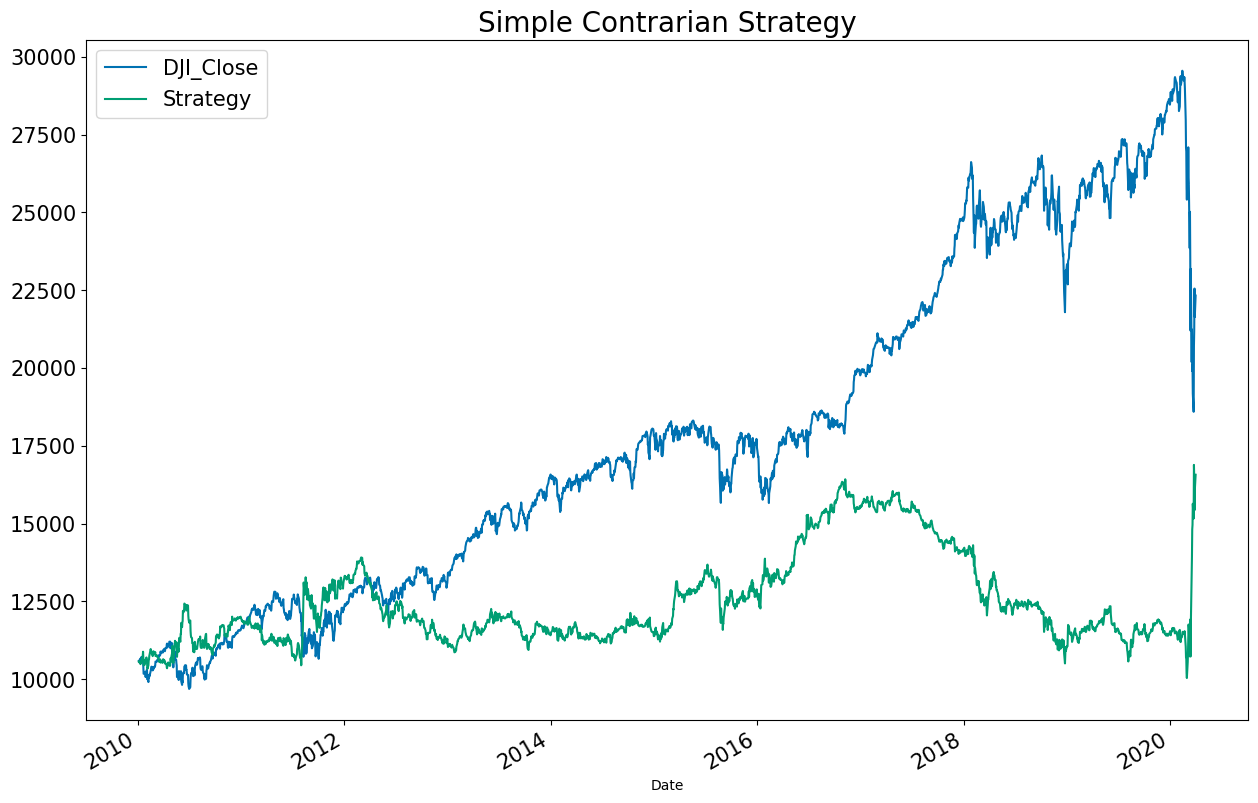

In [27]:
df[['DJI_Close', 'Strategy']].plot(figsize = (15, 10), fontsize = 15)
plt.legend(fontsize = 15)
plt.title('Simple Contrarian Strategy', fontsize = 20)
plt.show()

In [28]:
# As we can see again, Passive (buy and hold) strategy is better.
# There is some small periods where this strategy performs good, in long run it is not good